In [50]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [51]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

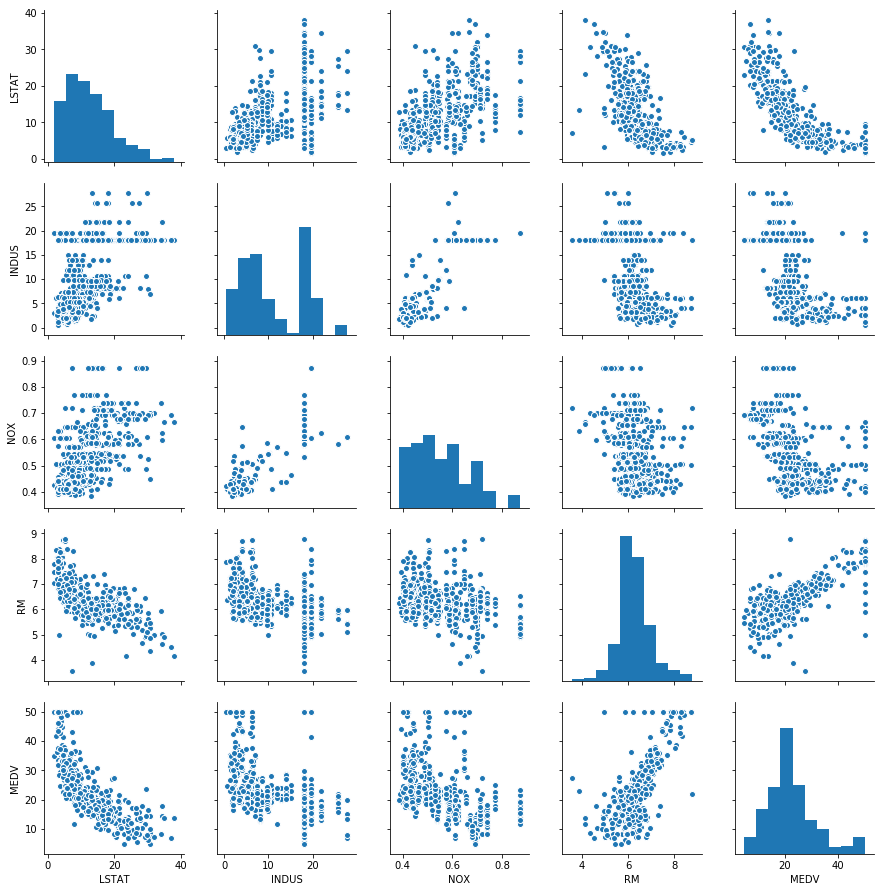

In [52]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols],size=2.5)

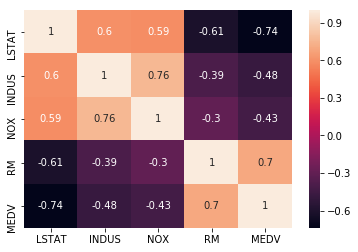

In [53]:
sns.heatmap(df[cols].corr(),annot=True)

In [54]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

        

In [55]:
X = df[['RM']].values

y = df['MEDV'].values

In [56]:
import numpy as np
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

In [57]:
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()

In [58]:
lr = LinearRegressionGD()

In [59]:
lr.fit(X_std,Y_std)

In [60]:
lr.n_iter

20

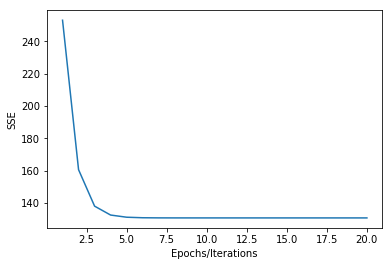

In [61]:
plt.plot(range(1,lr.n_iter+1),lr.cost_)

plt.xlabel("Epochs/Iterations")
plt.ylabel("SSE")

In [64]:
def plot_lin_reg(X,y,model) : 
        
        plt.scatter(X,y,c='steelblue', edgecolor='white', s=70)
        plt.plot(X,model.predict(X),color='black', lw=2)

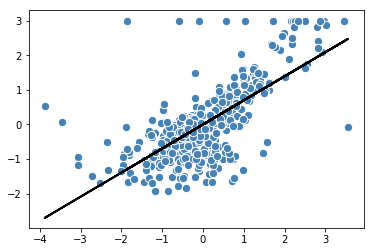

In [65]:
plot_lin_reg(X_std,Y_std,lr)

In [67]:
print('Intercept: %.3f' % lr.w_[0])

Intercept: -0.000


In [68]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [69]:
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
print('Slope : %.3f'%lr_model.coef_[0])

Slope : 9.102


In [118]:
X = df[['RM']].values

y = df['MEDV'].values

In [119]:
#USING RANSAC REGRESSOR 

In [120]:
from sklearn.linear_model import RANSACRegressor

In [121]:
ransac = RANSACRegressor(LinearRegression(),min_samples=50,max_trials=100,loss="absolute_loss",residual_threshold=5.0,random_state=0)

In [122]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [123]:
inlier_mask = ransac.inlier_mask_

outlier_mask = np.logical_not(inlier_mask)

In [124]:
line_X = np.arange(1,14,1)

line_X = line_X[:,np.newaxis]


In [125]:
line_y_ransac = ransac.predict(line_X)

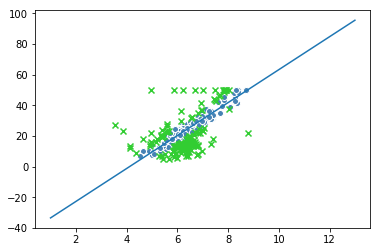

In [126]:
plt.scatter(X[inlier_mask],y[inlier_mask],c="steelblue",edgecolor ="white",marker="o",label="Inliers")

plt.scatter(X[outlier_mask],y[outlier_mask],c="limegreen",edgecolor ="white",marker="x",label="Outliers")

plt.plot(line_X,line_y_ransac)

In [127]:
print('Slope: %.3f' %ransac.estimator_.coef_[0])

Slope: 10.735


In [128]:
print('Intercept: %.3f' %ransac.estimator_.intercept_)

Intercept: -44.089
